# Car Price Prediction Model




## Initialisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date as dt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools

## 1. Data Loading

In [2]:
# Data from webscraper that only has cars that does not come under an insurance write-off
exclude_dict = {'Mercedes-Benz_A Class-exclude.txt':'a','Mercedes-Benz_B Class_exclude.txt':'b','Mercedes-Benz_C Classexclude.txt':'c',
                'Mercedes-Benz_CLA Class_exclude.txt':'cla','Mercedes-Benz_E Class_exclude.txt':'e','Mercedes-Benz_GLA Class_exclude.txt':'gla',
                'Mercedes-Benz_GLC Class_exclude.txt':'glc','Mercedes-Benz_GLE Class_exclude.txt':'gle'}

### Please ensure the files are mentioned within the correct working directory
for name,df_sub_name in exclude_dict.items():
    locals()[f'df_exclude_{df_sub_name}'] = pd.read_csv(name,encoding='UTF8')
    locals()[f'df_exclude_{df_sub_name}']['model'] = df_sub_name.upper() + ' Class'
    locals()[f'df_exclude_{df_sub_name}']['writeoff'] = 0
    # print(f'df_exclude_{df_sub_name}')

exclude_df = pd.concat([df_exclude_a,
                        df_exclude_b,
                        df_exclude_c,
                        df_exclude_cla,
                        df_exclude_e,
                        df_exclude_gla,
                        df_exclude_glc,
                        df_exclude_gle])

# Data from webscraper that only has cars that is classified as an insurance write-off
writeoff_dict = {'Mercedes-Benz_A Class_writeoff.txt':'a','Mercedes-Benz_B Class_writeoff.txt':'b','Mercedes-Benz_C Class_writeoff.txt':'c',
                 'Mercedes-Benz_CLA Class_writeoff.txt':'cla','Mercedes-Benz_E Class_writeoff.txt':'e','Mercedes-Benz_GLA Class_writeoff.txt':'gla',
                 'Mercedes-Benz_GLC Class_writeoff.txt':'glc','Mercedes-Benz_GLE Class_writeoff.txt':'gle'}

### Please ensure the files are mentioned within the correct working directory
for name,df_sub_name in writeoff_dict.items():
    locals()[f'df_writeoff_{df_sub_name}'] = pd.read_csv( name,encoding='UTF8')
    locals()[f'df_writeoff_{df_sub_name}']['model'] = df_sub_name.upper() + ' Class'
    locals()[f'df_writeoff_{df_sub_name}']['writeoff'] = 1
    # print(f'df_writeoff_{df_sub_name}')

writeoff_df = pd.concat([df_writeoff_a,
                         df_writeoff_b,
                         df_writeoff_c,
                         df_writeoff_cla,
                         df_writeoff_e,
                         df_writeoff_gla,
                         df_writeoff_glc,
                         df_writeoff_gle])
full_df = pd.concat([exclude_df,writeoff_df])
# full_df.drop_duplicates(keep='first',inplace=True)

# checking shape of the fully joined dataframe
print(full_df.shape)
# resetting index after concatenation
full_df.reset_index(drop=True,inplace=True)
print(full_df.shape)

full_df.head()

(23085, 14)
(23085, 14)


,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,model,writeoff
0,Mercedes-Benz A-Class,https://www.autotrader.co.uk/dealers/norfolk/n...,£795,142791,136.0,Automatic,Petrol,3.0,Hatchback,ULEZ,2.0L,2005 (55 reg),A Class,0
1,Mercedes-Benz A Class,https://www.autotrader.co.uk/dealers/middlesex...,"£1,995",90565,136.0,Automatic,Petrol,6.0,Hatchback,ULEZ,2.0L,2005 (55 reg),A Class,0
2,Mercedes-Benz A Class,https://www.autotrader.co.uk/dealers/middlesex...,"£2,098",25000,95.0,Manual,Petrol,3.0,Hatchback,ULEZ,1.5L,2005 (05 reg),A Class,0
3,Mercedes-Benz A Class,https://www.autotrader.co.uk/dealers/buckingha...,"£2,995",37600,82.0,Automatic,Diesel,2.0,Hatchback,NaN,2.0L,2005 (55 reg),A Class,0
4,Mercedes-Benz A Class,https://www.autotrader.co.uk/dealers/warwicksh...,"£1,850",99000,109.0,Automatic,Diesel,NaN,Hatchback,NaN,2.0L,2005 (55 reg),A Class,0


## 2. Data Cleaning

In [3]:
# creating a backup of the original dataframe before doing any processing on it.
backup_df = full_df.copy()

In [4]:
# dropping duplicates
full_df.drop_duplicates(keep='first',inplace=True)
full_df.shape

(23072, 14)

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23072 entries, 0 to 23084
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23072 non-null  object 
 1   link          23072 non-null  object 
 2   price         23072 non-null  object 
 3   mileage       23072 non-null  int64  
 4   BHP           4407 non-null   float64
 5   transmission  23065 non-null  object 
 6   fuel          23067 non-null  object 
 7   owners        8539 non-null   float64
 8   body          23056 non-null  object 
 9   ULEZ          19839 non-null  object 
 10  engine        23048 non-null  object 
 11  year          22597 non-null  object 
 12  model         23072 non-null  object 
 13  writeoff      23072 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.6+ MB


In [6]:
# removing all the special characters from the 'price' column, so that it can be converted to an integer field
full_df['price'] = full_df['price'].str.replace('£', '').str.replace(',','').astype(int)
# removing all the letters from the 'engine' column, so that it can be converted to a numeric field
full_df['engine'] = full_df['engine'].str.replace('L', '').str.replace('l','').astype(float)

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23072 entries, 0 to 23084
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23072 non-null  object 
 1   link          23072 non-null  object 
 2   price         23072 non-null  int64  
 3   mileage       23072 non-null  int64  
 4   BHP           4407 non-null   float64
 5   transmission  23065 non-null  object 
 6   fuel          23067 non-null  object 
 7   owners        8539 non-null   float64
 8   body          23056 non-null  object 
 9   ULEZ          19839 non-null  object 
 10  engine        23048 non-null  float64
 11  year          22597 non-null  object 
 12  model         23072 non-null  object 
 13  writeoff      23072 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 2.6+ MB


In [8]:
# changing the eligible columns to a 'category' data type.
dtype_dict = {'transmission':'category',
              'fuel':'category',
              'body':'category',
              'model':'category',
              'ULEZ':'category'}

full_df = full_df.astype(dtype_dict)
full_df.dtypes

name              object
link              object
price              int64
mileage            int64
BHP              float64
transmission    category
fuel            category
owners           float64
body            category
ULEZ            category
engine           float64
year              object
model           category
writeoff           int64
dtype: object

In [9]:
def reg_year_half_category(df):
    """
    Function to determine the biannual
    registration half in which the car was registered.
    """
    # print(df.year)
    if df.year == df.year:
        reg_plate_num = df.year.split('(')[-1].replace(')','').split(' ')[0]
        if reg_plate_num != 'L':
            if int(reg_plate_num) < 50:
                return 1
            else: return 2
        else: return 0

def reg_year(df):
    """
    Function to determine the year in which the car was registered.
    """
    # print(df.year)
    if df.year == df.year:
        reg_plate_num = df.year.split('(')[-1].replace(')','').split(' ')[0]
        if reg_plate_num != 'L':
            if int(reg_plate_num) < 50:
                return int(reg_plate_num) + 2000
            else: return int(reg_plate_num) + 1950

def model_year(df):
    """
    Function to determine the year in which the car was manufactured.
    """
    # print(df.year)
    if df.year == df.year:
        model_year = df.year.split('(')[0]
        return model_year

def region_def(df):
    """
    Function to determine the region information of the car.
    """
    if len(df.link.split('/'))>5:
        return df.link.split('/')[4]
    else: return

def location_def(df):
    """
    Function to determine the location information of the car.
    """
    if len(df.link.split('/'))>5:
        return df.link.split('/')[5]
    else: return

In [10]:
# applying the previously defined functions and creating respective new columns to not tamper with original dataframe contents
full_df['reg_year_half'] = full_df.apply(reg_year_half_category,axis=1)
full_df['reg_year'] = full_df.apply(reg_year, axis=1).astype(float)
full_df['model_year'] = full_df.apply(model_year, axis=1).astype(float)
full_df['region'] = full_df.apply(region_def,axis=1)
full_df['location'] = full_df.apply(location_def,axis=1)

# using lambda function within apply to calculate age of the car with respect to current date
full_df['age'] = full_df.apply(lambda row: dt.today().year - row.reg_year, axis=1)

In [11]:
# dropping 'BHP' column because it has too many null values and very little information to fill the null values.
# dropping 'link' column as it serves no purpose to the model.
# dropping 'year' column as it is of no use anymore.
full_df.drop(columns=['link','BHP','year'],inplace=True)
print(full_df.shape)
full_df.head(10)

(23072, 17)


,name,price,mileage,transmission,fuel,owners,body,ULEZ,engine,model,writeoff,reg_year_half,reg_year,model_year,region,location,age
0,Mercedes-Benz A-Class,795,142791,Automatic,Petrol,3.0,Hatchback,ULEZ,2.0,A Class,0,2.0,2005.0,2005.0,norfolk,norwich,17.0
1,Mercedes-Benz A Class,1995,90565,Automatic,Petrol,6.0,Hatchback,ULEZ,2.0,A Class,0,2.0,2005.0,2005.0,middlesex,northolt,17.0
2,Mercedes-Benz A Class,2098,25000,Manual,Petrol,3.0,Hatchback,ULEZ,1.5,A Class,0,1.0,2005.0,2005.0,middlesex,enfield,17.0
3,Mercedes-Benz A Class,2995,37600,Automatic,Diesel,2.0,Hatchback,NaN,2.0,A Class,0,2.0,2005.0,2005.0,buckinghamshire,high-wycombe,17.0
4,Mercedes-Benz A Class,1850,99000,Automatic,Diesel,NaN,Hatchback,NaN,2.0,A Class,0,2.0,2005.0,2005.0,warwickshire,birmingham,17.0
5,Mercedes-Benz A Class,3200,64120,Automatic,Petrol,3.0,Hatchback,ULEZ,1.5,A Class,0,1.0,2005.0,2005.0,middlesex,west-drayton,17.0
6,Mercedes-Benz A Class,1995,98417,Manual,Petrol,3.0,Hatchback,ULEZ,1.5,A Class,0,1.0,2005.0,2005.0,None,None,17.0
7,Mercedes-Benz A Class,2500,82475,Automatic,Petrol,2.0,Hatchback,ULEZ,2.0,A Class,0,1.0,2005.0,2005.0,leicestershire,leicester,17.0
8,Mercedes-Benz A Class,3495,53000,Automatic,Petrol,5.0,Hatchback,ULEZ,1.7,A Class,0,2.0,2005.0,2005.0,northamptonshire,peterborough,17.0
9,Mercedes-Benz A Class,1995,93563,Automatic,Petrol,3.0,Hatchback,ULEZ,1.7,A Class,0,2.0,2005.0,2005.0,None,None,17.0


## 3. Data Exploration

In [12]:
full_df.describe()

,price,mileage,owners,engine,writeoff,reg_year_half,reg_year,model_year,age
count,23072.000000,23072.000000,8539.000000,23048.000000,23072.000000,22597.000000,22596.000000,22597.000000,22596.000000
mean,22874.142207,48102.526526,2.688839,2.097375,0.023752,1.517148,2016.456984,2016.550648,5.543016
std,14319.778930,32726.466690,1.032174,0.746292,0.152278,0.499805,3.174230,3.181360,3.174230
min,650.000000,50.000000,2.000000,1.200000,0.000000,0.000000,2004.000000,2005.000000,0.000000
25%,14187.500000,22895.500000,2.000000,1.600000,0.000000,1.000000,2015.000000,2015.000000,3.000000
50%,21000.000000,40922.000000,2.000000,2.000000,0.000000,2.000000,2017.000000,2017.000000,5.000000
75%,29100.000000,66000.000000,3.000000,2.100000,0.000000,2.000000,2019.000000,2019.000000,7.000000
max,1000000.000000,685000.000000,13.000000,6.300000,1.000000,2.000000,2022.000000,2021.000000,18.000000


In [13]:
print(full_df.transmission.unique(),'\n')
print(full_df.fuel.unique(),'\n')
print(full_df.body.unique(),'\n')
print(full_df.ULEZ.unique(),'\n')
# print(full_df.region.unique(),'\n')
# print(full_df.location.unique(),'\n'),

['Automatic', 'Manual', NaN]
Categories (2, object): ['Automatic', 'Manual'] 

['Petrol', 'Diesel', 'Petrol Plug-in Hybrid', 'Petrol Hybrid', NaN, 'Electric', 'Diesel Hybrid', 'Diesel Plug-in Hybrid']
Categories (7, object): ['Diesel', 'Diesel Hybrid', 'Diesel Plug-in Hybrid', 'Electric', 'Petrol', 'Petrol Hybrid', 'Petrol Plug-in Hybrid'] 

['Hatchback', 'Saloon', 'Estate', 'MPV', 'Coupe', 'Convertible', NaN, 'SUV']
Categories (7, object): ['Convertible', 'Coupe', 'Estate', 'Hatchback', 'MPV', 'SUV', 'Saloon'] 

['ULEZ', NaN]
Categories (1, object): ['ULEZ'] 



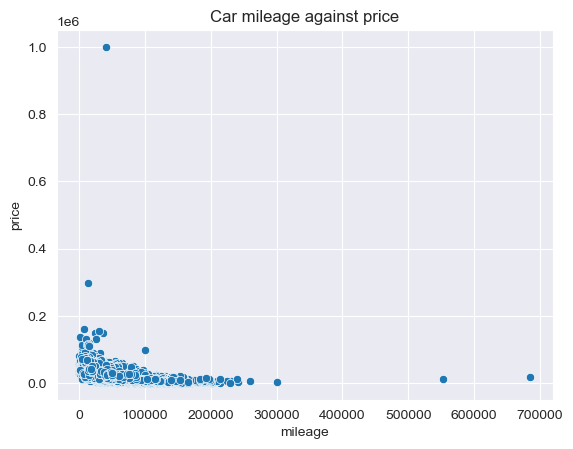

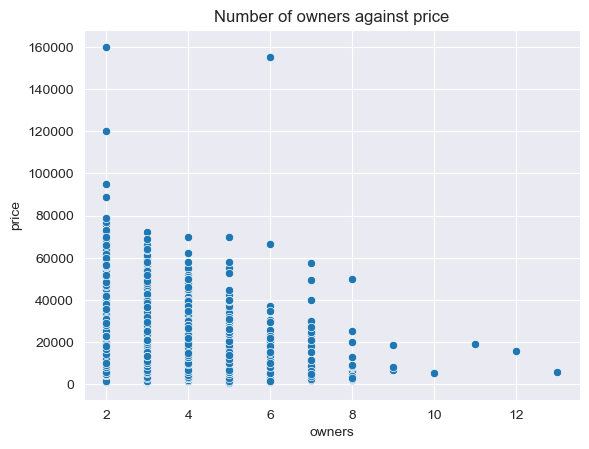

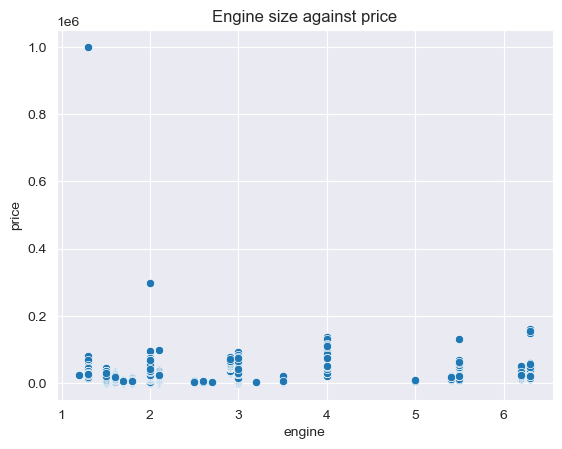

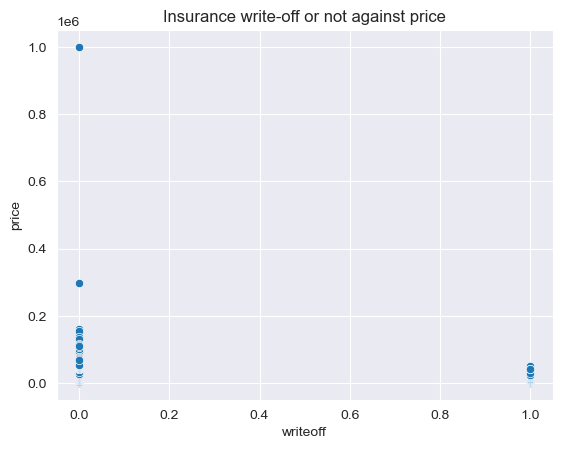

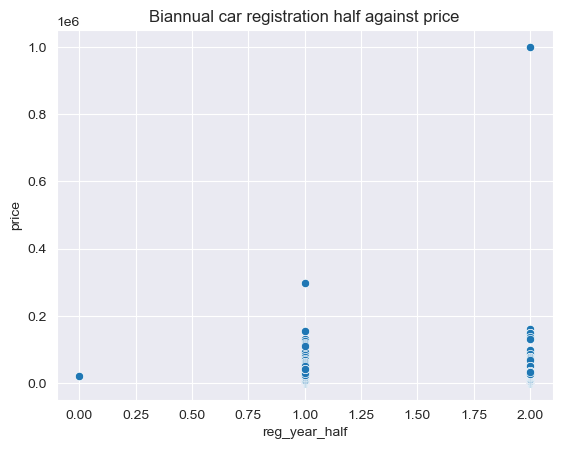

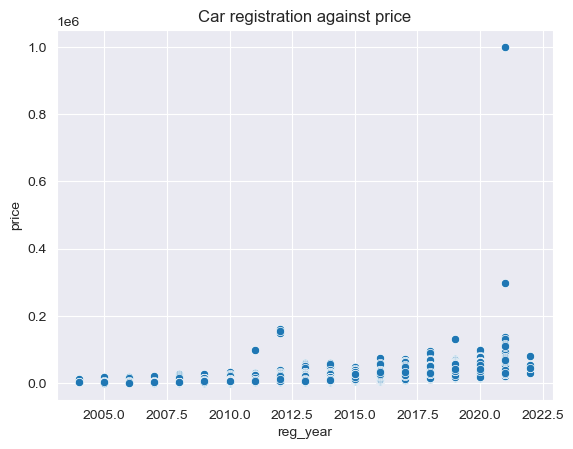

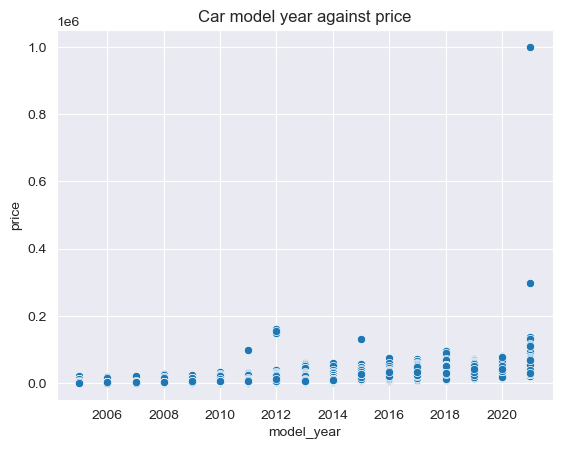

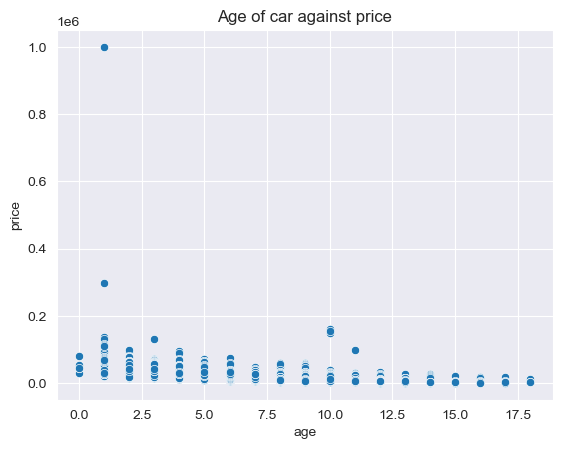

In [14]:
numeric_cols = ['mileage', 'owners', 'engine', 'writeoff',
                'reg_year_half','reg_year', 'model_year', 'age']
title_dict = {'mileage':'Car mileage', 'owners':'Number of owners', 'engine':'Engine size', 'writeoff': 'Insurance write-off or not',
              'reg_year_half':'Biannual car registration half','reg_year':'Car registration', 'model_year':'Car model year', 'age': 'Age of car'}
for col in numeric_cols:
    sns.scatterplot(x=full_df[col], y=full_df['price'])
    plt.title(f'{title_dict[col]} against price')
    plt.show()

From initial exploration it is clear that there are some outliers.
From the graphs seen above it is clear that the price need to be limited.
Let us take a closer look below:

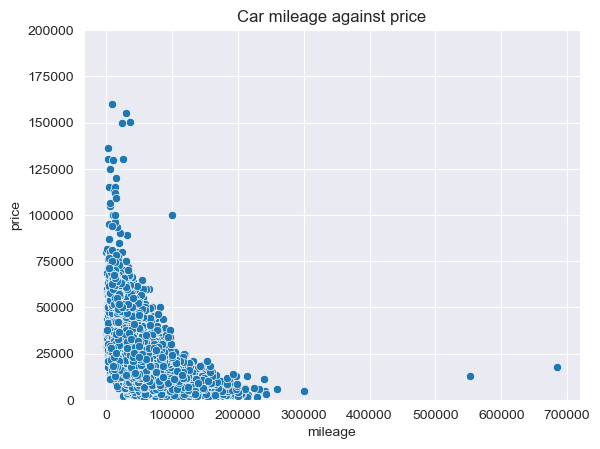

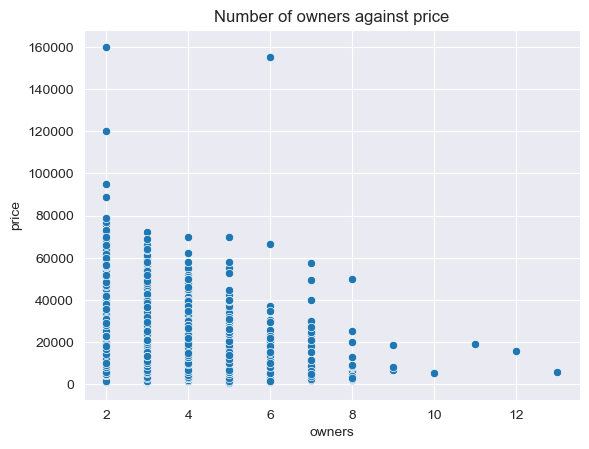

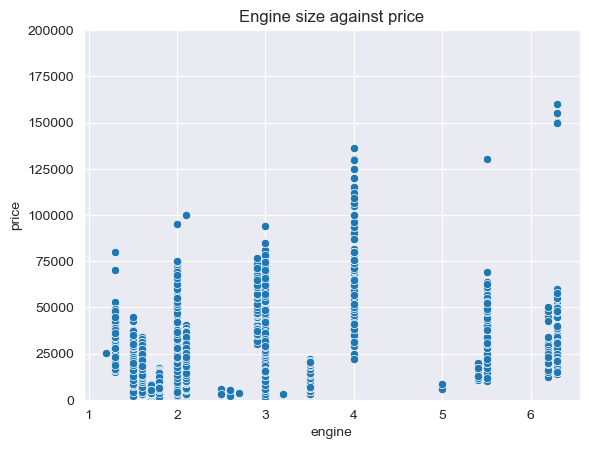

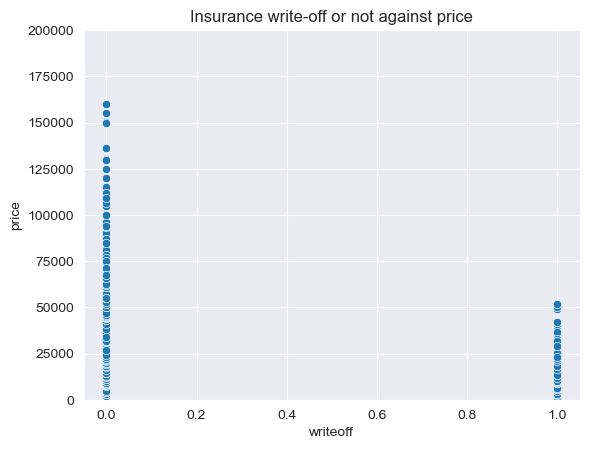

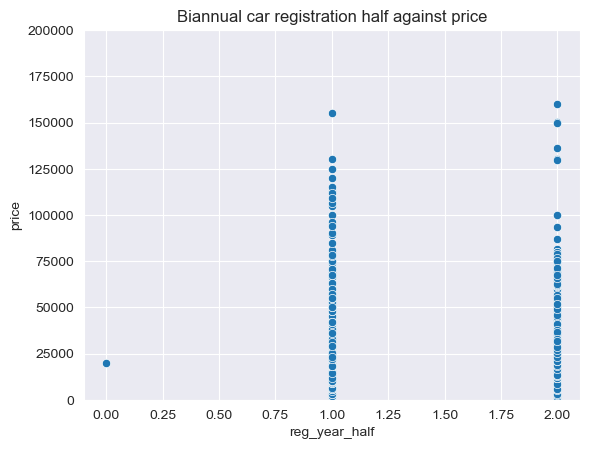

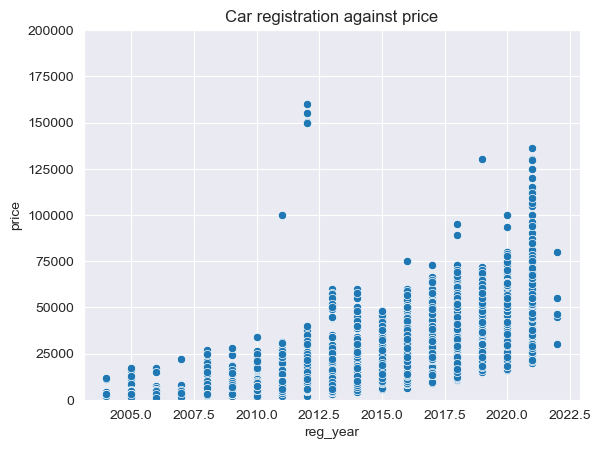

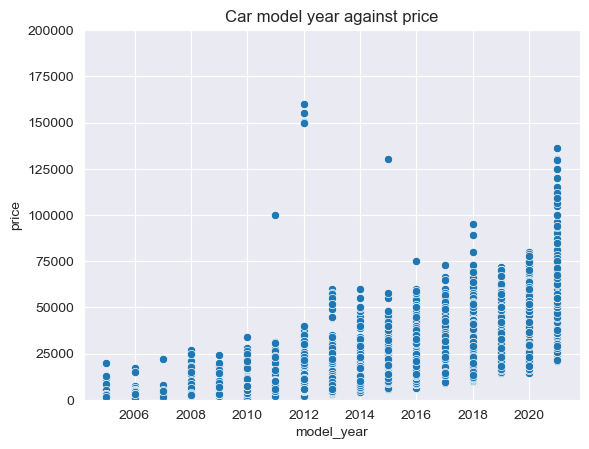

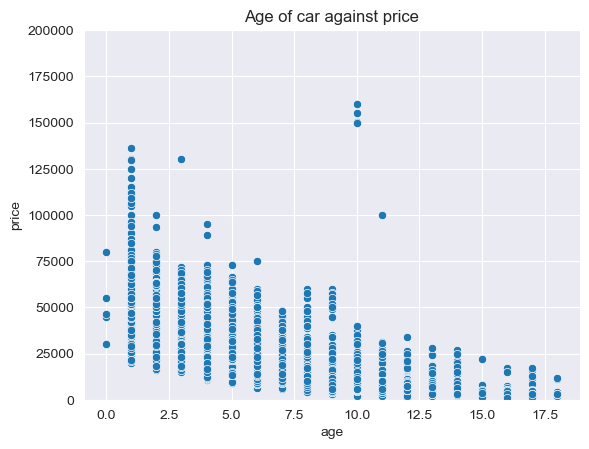

In [15]:
for col in numeric_cols:
    sns.scatterplot(x=full_df[col], y=full_df['price'])
    plt.title(f'{title_dict[col]} against price')
    if col != 'owners': plt.ylim(0,200000)
    # if col == 'mileage': plt.xlim(0,250000)
    plt.show()

Upon closer inspection it is clear that the price needs to be further filtered to a maximum of £80,000 to avoid the model from being influenced by more extreme data.
Furthermore, mileage of the car also seems to have outliers therefore, it will be filtered to at least 5000 miles and at most 200,000 miles.
As well as, age of the car omitting new cars with an age less than 2 years.

In [16]:
# mask = [(full_df.price < 80000) &
#         (full_df.mileage <= 1000) &
#         (full_df.mileage >= 200000) &
#         (full_df.age < 1)]
df_selection  = full_df[
                        (full_df.price < 80000) &
                        (full_df.mileage >= 5000) &
                        (full_df.mileage <= 200000) &
                        (full_df.age > 1)
                        ].copy()
print(df_selection.shape)
df_selection.info()

(21181, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21181 entries, 0 to 23084
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           21181 non-null  object  
 1   price          21181 non-null  int64   
 2   mileage        21181 non-null  int64   
 3   transmission   21174 non-null  category
 4   fuel           21177 non-null  category
 5   owners         8248 non-null   float64 
 6   body           21170 non-null  category
 7   ULEZ           18048 non-null  category
 8   engine         21160 non-null  float64 
 9   model          21181 non-null  category
 10  writeoff       21181 non-null  int64   
 11  reg_year_half  21181 non-null  float64 
 12  reg_year       21181 non-null  float64 
 13  model_year     21181 non-null  float64 
 14  region         16897 non-null  object  
 15  location       16897 non-null  object  
 16  age            21181 non-null  float64 
dtypes: category(5), flo

In [17]:
# dropping rows with no engine size, transmission type, fuel type and body type
cleaned_df = df_selection.dropna(subset=['engine','fuel','transmission','body']).copy()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21141 entries, 0 to 23084
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           21141 non-null  object  
 1   price          21141 non-null  int64   
 2   mileage        21141 non-null  int64   
 3   transmission   21141 non-null  category
 4   fuel           21141 non-null  category
 5   owners         8235 non-null   float64 
 6   body           21141 non-null  category
 7   ULEZ           18031 non-null  category
 8   engine         21141 non-null  float64 
 9   model          21141 non-null  category
 10  writeoff       21141 non-null  int64   
 11  reg_year_half  21141 non-null  float64 
 12  reg_year       21141 non-null  float64 
 13  model_year     21141 non-null  float64 
 14  region         16865 non-null  object  
 15  location       16865 non-null  object  
 16  age            21141 non-null  float64 
dtypes: category(5), float64(6), int

In [18]:
# sns.scatterplot(x=np.log(cleaned_df.age),y=cleaned_df.price)

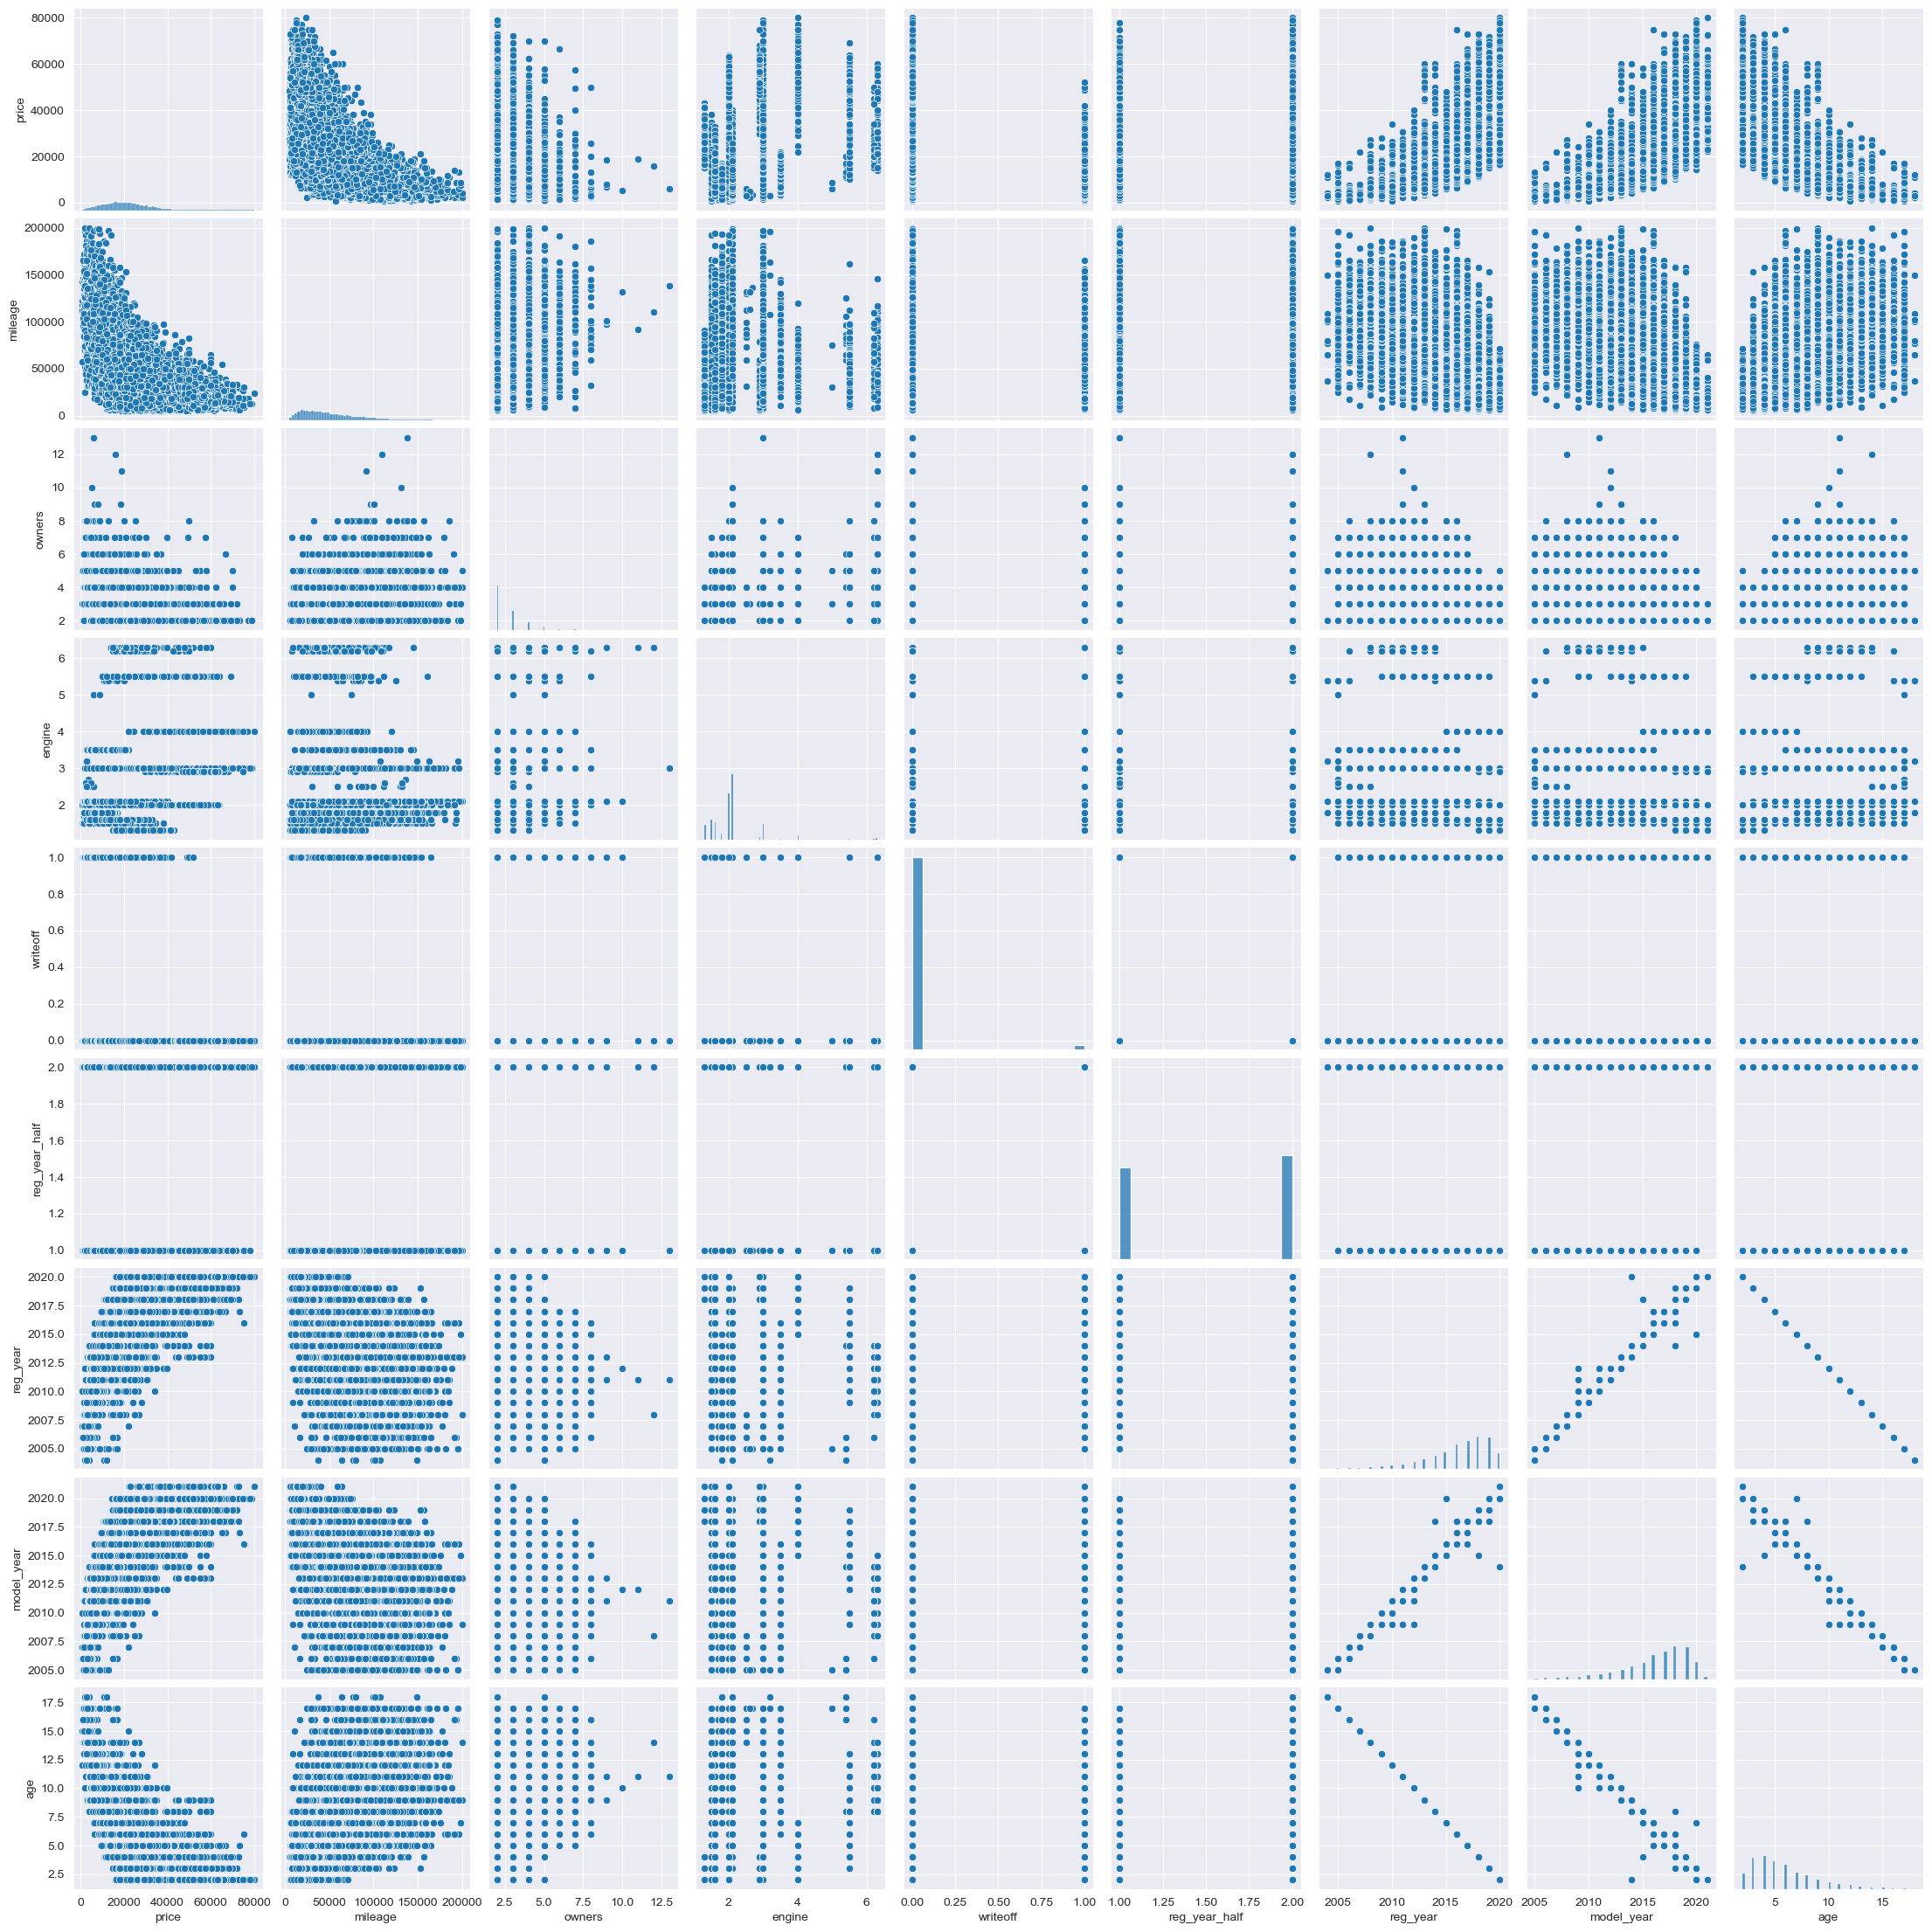

In [19]:
# final exploration
sns.pairplot(cleaned_df)
plt.show()

Doing a further EDA to avoid any outliers causing any unwanted behaviours within the regression model

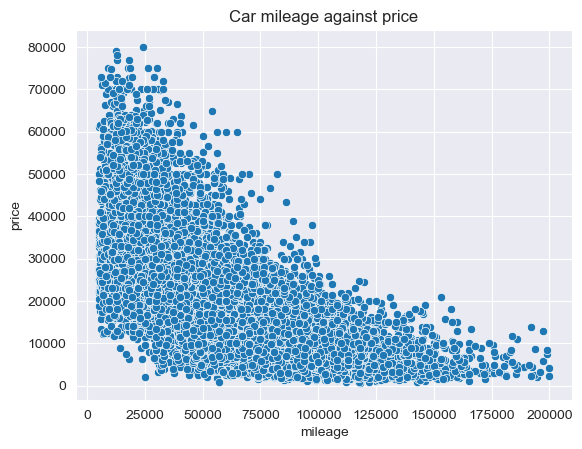

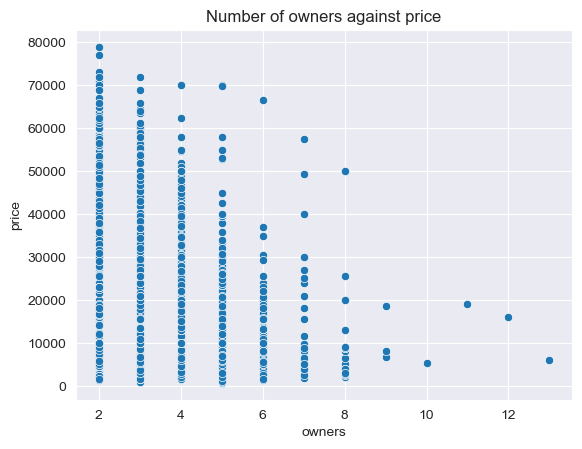

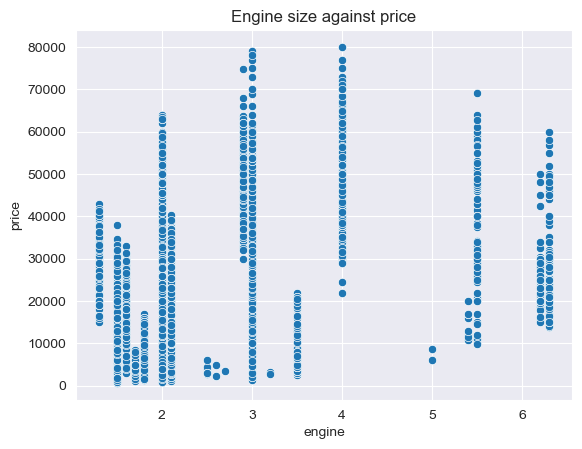

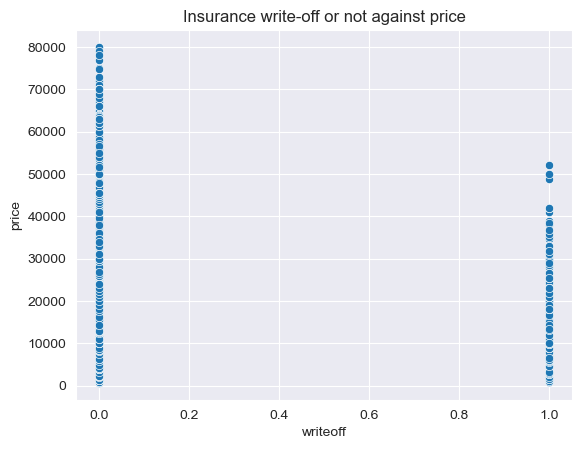

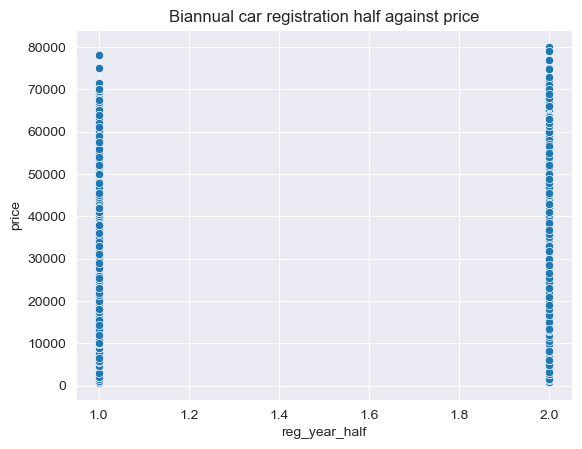

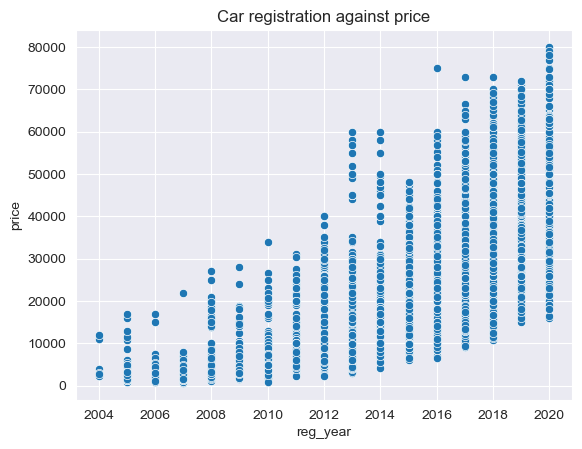

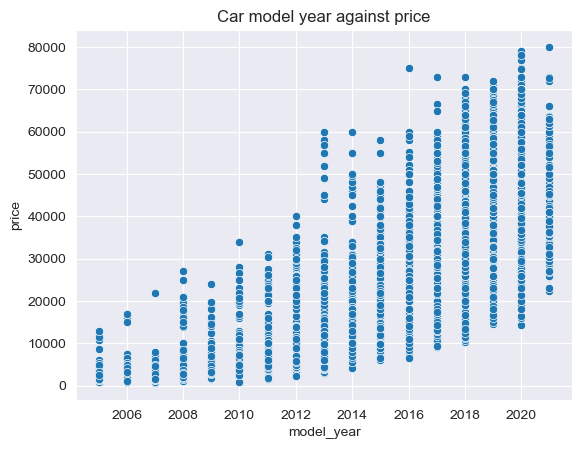

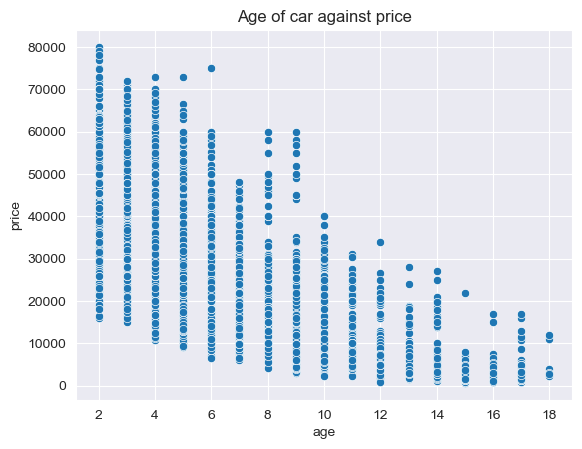

In [20]:
for col in numeric_cols:
    sns.scatterplot(x=cleaned_df[col], y=cleaned_df['price'])
    plt.title(f'{title_dict[col]} against price')
    # if col != 'owners': plt.ylim(0,200000)
    # if col == 'mileage': plt.xlim(0,250000)
    plt.show()

<AxesSubplot:xlabel='mileage', ylabel='price'>

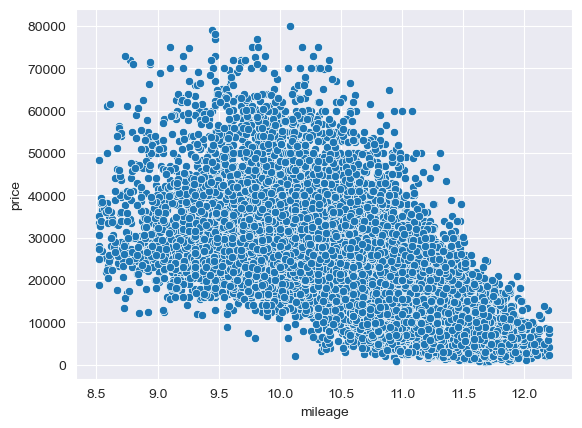

In [21]:
sns.scatterplot(x=np.log(cleaned_df.mileage), y=cleaned_df.price)

Looking at the graphs the data will be filtered down to a maximum price of 55,000 for better model performance.

In [22]:
# cleaned_df_e_class = cleaned_df_e_class[cleaned_df_e_class.price <= 55000]
# cleaned_df_e_class.shape

## 4. Train/Test Split

In [23]:
# all_columns = ['name', 'price', 'mileage', 'transmission', 'fuel', 'owners', 'body',
#                'ULEZ', 'engine', 'model', 'writeoff', 'reg_year_half', 'reg_year',
#                'model_year', 'region', 'location', 'age']

feat_cols = ['mileage', 'transmission', 'fuel', 'owners', 'body',
             'ULEZ', 'engine', 'model', 'writeoff', 'reg_year_half',
             'reg_year', 'model_year', 'age']

X = cleaned_df[feat_cols]
y = cleaned_df['price']

# Normal split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Stratified split
# X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=X.model)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16912, 13), (16912,), (4229, 13), (4229,))

In [25]:
## Checking training strata
# percent_train = X_train_s.groupby('model')['engine']
#
# for name, group in percent_train:
#     print(name)
#     print(round((len(group)/X_train.shape[0])*100,2))

In [26]:
## Checking test strata
# percent_test = X_test_s.groupby('model')['engine']
#
# for name, group in percent_test:
#     print(name)
#     print(round((len(group)/X_test.shape[0])*100,2))

,mileage,owners,ULEZ,engine,reg_year,model_year,age,new_owners,log_mileage,log_age,...,wo_1,ryh_2.0,model_B Class,model_C Class,model_CLA Class,model_E Class,model_GLA Class,model_GLC Class,model_GLE Class,const
16042,60834,NaN,ULEZ,2.1,2015.0,2016.0,7.0,2.0,11.015904,1.945910,...,0,1,0,0,0,1,0,0,0,1
3130,51124,NaN,ULEZ,1.5,2019.0,2019.0,3.0,2.0,10.842009,1.098612,...,0,1,0,0,0,0,0,0,0,1
11783,40063,NaN,ULEZ,2.0,2019.0,2019.0,3.0,2.0,10.598208,1.098612,...,0,0,0,1,0,0,0,0,0,1
4478,16444,NaN,ULEZ,1.3,2019.0,2020.0,3.0,2.0,9.707716,1.098612,...,0,1,0,0,0,0,0,0,0,1
5791,13735,NaN,ULEZ,1.5,2017.0,2017.0,5.0,2.0,9.527703,1.609438,...,0,0,1,0,0,0,0,0,0,1


Index(['mileage', 'owners', 'ULEZ', 'engine', 'reg_year', 'model_year', 'age',
       'new_owners', 'log_mileage', 'log_age', 'inv_age', 'ulez_ULEZ',
       'body_Coupe', 'body_Estate', 'body_Hatchback', 'body_MPV', 'body_SUV',
       'body_Saloon', 'trnm_Manual', 'fuel_Diesel Hybrid',
       'fuel_Diesel Plug-in Hybrid', 'fuel_Electric', 'fuel_Petrol',
       'fuel_Petrol Hybrid', 'fuel_Petrol Plug-in Hybrid', 'wo_1', 'ryh_2.0',
       'model_B Class', 'model_C Class', 'model_CLA Class', 'model_E Class',
       'model_GLA Class', 'model_GLC Class', 'model_GLE Class', 'const'],
      dtype='object')


(16912, 18)

(16912,)

rmse: 4931.181614316313 

engine                         6373.893134
new_owners                     -408.823459
log_mileage                   -2962.775875
log_age                      -14177.141592
ulez_ULEZ                      1078.053173
body_Coupe                      414.293098
body_Estate                   -1907.327341
body_Hatchback                -3151.353084
body_Saloon                   -2427.492131
trnm_Manual                   -2545.476364
fuel_Diesel Hybrid              645.232459
fuel_Diesel Plug-in Hybrid     7344.843821
fuel_Petrol                    1186.867501
fuel_Petrol Hybrid             5879.682854
fuel_Petrol Plug-in Hybrid     1621.351343
wo_1                          -3055.231061
ryh_2.0                        1453.754517
const                         63556.216763
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                     

In [35]:
# x = DataFrame(data=np.array, columns=feature_cols)

In [36]:
# feature_cols = ['const', 'engine', 'new_owners', 'log_mileage', 'log_age',
#                 'ulez_ULEZ', 'body_Coupe', 'body_Estate',
#                 'body_Saloon', 'trnm_Manual', 'fuel_Diesel Hybrid',
#                 'fuel_Diesel Plug-in Hybrid', 'fuel_Petrol',
#                 'fuel_Petrol Hybrid', 'fuel_Petrol Plug-in Hybrid', 'wo_1', 'ryh_2.0']

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X):
    ''' Function to calculate the VIF of a dataframe '''
    vif = pd.DataFrame() ## Initialising an empty dataframe
    vif['Features'] = feature_cols ## The features are the ones used in training

    ''' Calculating the VIF of each individual feature '''
    vif['VIF'] = [variance_inflation_factor(X[feature_cols].values, i) for i in range(X[feature_cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2) ## Rounding it up to 2 decimal places

    vif = vif.sort_values(by = "VIF", ascending = False) ## Sort it from highest to lowest

    return(vif)
checkVIF(X_train_eng)

,Features,VIF
17,const,479.05
3,log_age,2.85
2,log_mileage,2.32
7,body_Hatchback,1.62
8,body_Saloon,1.61
4,ulez_ULEZ,1.57
1,new_owners,1.46
5,body_Coupe,1.41
6,body_Estate,1.31
0,engine,1.30


4883.187088142048
